# **Program 6**

___


## **Aim:** 
Write a program to clip line using Cyrus beck Algorithm. All the cases discussed in class has to be demonstrated.

## **Theory:**

The Cyrus–Beck algorithm is a generalized line clipping algorithm. It was designed to be more efficient than the Cohen–Sutherland algorithm, which uses repetitive clipping.[1] Cyrus–Beck is a general algorithm and can be used with a convex polygon clipping window, unlike Sutherland–Cohen, which can be used only on a rectangular clipping area.

Here the parametric equation of a line in the view plane is

\begin{aligned}\mathbf {p} (t)&=t\mathbf {p} _{1}+(1-t)\mathbf {p} _{0}\\\end{aligned}

## **Algorithm:**

* Normals of every edge is calculated.
* Vector for the clipping line is calculated.
* Dot product between the difference of one vertex per edge and one selected end point of the clipping line and the normal of the edge is calculated (for all edges).
* Dot product between the vector of the clipping line and the normal of edge (for all edges) is calculated.
* The former dot product is divided by the latter dot product and multiplied by -1. This is ‘t’.
* The values of ‘t’ are classified as entering or exiting (from all edges) by observing their denominators (latter dot product).
* One value of ‘t’ is chosen from each group, and put into the parametric form of a line to calculate the coordinates.
* If the entering ‘t’ value is greater than the exiting ‘t’ value, then the clipping line is rejected.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def ROUND(a):

  return int(a + 0.5)

def drawDDA(x1,y1,x2,y2,img):

  x,y = x1,y1
  length = (x2-x1) if (x2-x1) > (y2-y1) else (y2-y1)

  dx = (x2-x1)/float(length)

  dy = (y2-y1)/float(length)

  img.putpixel((ROUND(x),ROUND(y)),1)

  for i in range(length):

    x += dx

    y += dy

    img.putpixel((ROUND(x),ROUND(y)),1)

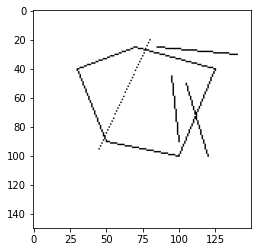

In [9]:
img = Image.fromarray(np.zeros((150, 150), dtype=np.float32), mode= "F")

drawDDA(30,40,70,25,img)
drawDDA(70, 25,125, 40,img)  
drawDDA(125, 40, 100, 100,img) 
drawDDA(50,90,100,100,img)
drawDDA(30,40,50,90,img)

drawDDA(95,45,100,90,img)
drawDDA(45,95,80,20,img)
drawDDA(85,25,140,30,img)
drawDDA(105,50,120,100,img)
plt.imshow(np.array(img),cmap='binary')
plt.savefig('OP1')

In [ ]:







Points = np.array([[30 , 40],
                   [70 , 25],
                   [125, 40],
                   [100,100],
                   [50 , 90],
                   [30 , 40]])

def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)


normals =[]

for i in range(5):
  vec= Points[i]-Points[i+1]
  temp=perpendicular(vec)
  temp=normalize(temp)
  normals.append(temp)


In [ ]:

img2 = Image.fromarray(np.zeros((150, 150), dtype=np.float32), mode= "F")

drawDDA(30,40,70,25,img2)
drawDDA(70, 25,125, 40,img2)  
drawDDA(125, 40, 100, 100,img2) 
drawDDA(50,90,100,100,img2)
drawDDA(30,40,50,90,img2)


def CyrusBeck(x1,y1,x2,y2,normal,points):
  
  P1=np.array([x2,y2])
  P0=np.array([x1,y1])

  tE_arr = [0]
  tL_arr  = [1]
  for i in range(len(normals)):

    Pe=points[i]
    n=normals[i]
    try:
      t_temp= -1*np.dot(n,P0-Pe)/(np.dot(n,P1-P0))
      denom= np.dot(n,P1-P0)

      if denom<0:
        tE_arr.append(t_temp)

      else:
        tL_arr.append(t_temp)

    except:
      continue

  tE=max(tE_arr)
    
  tL=min(tL_arr)
    
  print('tE= {} \ntL={} \n'.format(tE,tL) )
  if tL<tE:
    print("Line outside\n")
    
  else:

    x1_=ROUND(x1+(x2-x1)*tE)
    x2_=ROUND(x1+(x2-x1)*tL)
    y1_=ROUND(y1+(y2-y1)*tE)
    y2_=ROUND(y1+(y2-y1)*tL)

    drawDDA(x1_,y1_,x2_,y2_,img2)


tE= 0 
tL=1 

tE= 0.10769230769230767 
tL=0.9086021505376345 

tE= 0 
tL=-0.4090909090909091 

Line outside

tE= 0 
tL=0.4418604651162791 



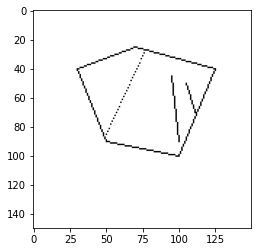

In [ ]:
CyrusBeck(95,45,100,90,normals,Points)
CyrusBeck(45,95,80,20,normals,Points)
CyrusBeck(85,25,140,30,normals,Points)
CyrusBeck(105,50,120,100,normals,Points)

plt.imshow(np.array(img2),cmap='binary')
plt.savefig('OP2')